# Udacity: Deep Learning

In [1]:
# should we be using Python 2 or 3? Assume 2 but import stuff from the future...
from __future__ import print_function

## L1 Machine Learning to Deep Learning

### Course Overview

Four sessions.

Session one:

* Logistic classification
* Stochastic optimization
* Data & parameter tuning

Session two:

* Deep networks
* Regularization

Session three:

* Convolutional networks

Session four:

* Recurrent models
* Embedding

Assignments are IPython notebooks running TensorFlow.

### Solving Problems - Big and Small

Deep learning is a family of techniques.

### Let's Get Started!

<img src="./Screen_Shot_2016-01-22_at_8.38.14_AM.png">

* 2009 Speech recognition
* 2012 Computer vision
* 2014 Machine translation

Data and GPUs!

### Supervised Classification

Classification is the process of taking an input and giving it a label. The following tasks build on the concepts of classification:

* regression
* reinforcement learning
* ranking
* detection

### Classification for Detection Quiz

What approach to detecting pedestrians?

Look for people shaped objects in a variety of poses (they may appear to be standing still or walking/running or pushing a cart, etc.). In principle, train a convolutional network to look for these shapes based on many examples.

Typical answer from Udacity: Run a binary classifier over different areas of an image and mark the areas with a positive label as detected instances. (Nice answer!)

### Classification for Ranking Quiz

Web search ranking. What results are relevant for a query?

Scrape links for keywords from the query and initially return the results with the best overall match. The algorithm can be improved in real time by weighting up links that people actually click on when shown the results.

Typical answer from Udacity: One way of doing this is to classify pairs of `(<query>, <web page>)` as relevant/not-relevant.

### Let's make a deal

### Training Your Logistic Classifier

`WX + b = Y`

Logistic classifiers are _linear_. The vector of inputs are multiplied by a vector of weights and have a bias term added. We want to find `W` and `b` to do classify well. Each input may have one and only one label, so we compute probabilities for each label, using a _softmax_ function.

\begin{equation}
S(y_i) = \frac{e^{y_i}}{\sum_j e^{y_j}}
\end{equation}

We call our scores "logits" and use the softmax to convert them into probabilities.

### Softmax

In [2]:
import numpy as np

In [3]:
scores = [3.0, 1.0, 0.2]

In [4]:
def softmax(X):
    exps = np.exp(X)
    sm = exps / np.sum(exps)
    return sm

In [5]:
print(softmax(scores))

[ 0.8360188   0.11314284  0.05083836]


In [6]:
print(np.sum(softmax(scores)))

1.0


In [7]:
import matplotlib.pyplot as plt

In [8]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

In [9]:
%matplotlib inline

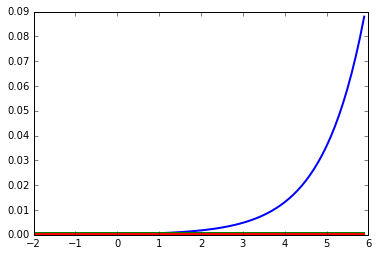

In [10]:
plt.plot(x, softmax(scores).T, linewidth=2)

In [11]:
import theano.tensor as T

In [12]:
from theano import function

In [13]:
y = T.dvector('y')
softm = function(inputs=[y], outputs=T.nnet.softmax(y))

In [14]:
softm([3.0, 1.0, 0.2])

array([[ 0.8360188 ,  0.11314284,  0.05083836]])

In [15]:
np.shape(scores[0])

(80,)

In [16]:
t = [[3.0, 1.0, 0.2], [0.5, 0.5, 0.5], [0.1, 0.1, 0.1]]
np.exp(t)

array([[ 20.08553692,   2.71828183,   1.22140276],
       [  1.64872127,   1.64872127,   1.64872127],
       [  1.10517092,   1.10517092,   1.10517092]])

In [17]:
np.sum(np.exp(t), axis=1)

array([ 24.02522151,   4.94616381,   3.31551275])

So, we need to be very careful about the _axis_ and the _shape_ of what we're doing! 

In [18]:
def softmax(X):
    exps = np.exp(X)
    sm = exps / np.sum(exps, axis=0)
    return sm

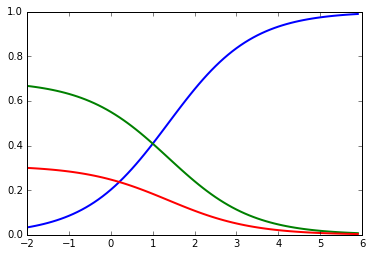

In [19]:
plt.plot(x, softmax(scores).T, linewidth=2)

In [20]:
np.shape(scores)

(3, 80)

In [21]:
np.shape(np.exp(scores))

(3, 80)

In [22]:
np.shape(np.sum(np.exp(scores), axis=0))

(80,)

In [23]:
np.shape(np.sum(np.exp(scores), axis=1))

(3,)

In [24]:
np.shape(np.exp(scores) / np.sum(np.exp(scores), axis=0))

(3, 80)

### Softmax Quiz 2

Suppose we multiply all the scores by 10. Do probabilites get close to either zero or one? Or do they get close to the uniform distribution?

In [25]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([10.0 * x, 10.0 * np.ones_like(x), 2.0 * np.ones_like(x)])

In [26]:
10.0 * x[:10]

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11.])

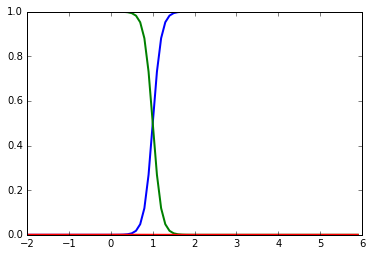

In [27]:
plt.plot(x, softmax(scores).T, linewidth=2)

Probabilities get close to either zero or one.

In [28]:
print(np.exp(10)/np.exp(9))
print(np.exp(1)/np.exp(0.9))

2.71828182846
1.10517091808


### Softmax Quiz 3

What happens if we divide the scores by 10?

In [29]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([0.1 * x, 0.1 * np.ones_like(x), 0.02 * np.ones_like(x)])

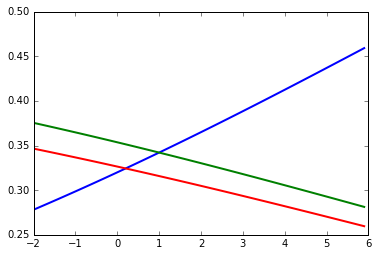

In [30]:
plt.plot(x, softmax(scores).T, linewidth=2)

Now probabilities get closer to the uniform distribution.

### One-Hot Encoding

How do we represent labels mathematically? We use 'one-hot' encoding. This is a vector of the same length of the number of labels, with one for the 'correct' label and 0 everywhere else.

<img src='Screen_Shot_2016-01-26_at_8.50.10_AM.png'>

### One-Hot Encoding Quiz

<img src='Screen_Shot_2016-01-26_at_8.53.27_AM.png'>

Each class must get a unique position in the vector.

### Cross Entropy

One-hot encoding works well until the number of classes becomes large.

We can now measure how well we are doing by comparing vectors - our prediction and the one-hot encodings.

<img src='Screen_Shot_2016-01-26_at_8.56.19_AM.png'>

\begin{equation}
D(S,L) = -\sum_i L_i \log (S_i)
\end{equation}

Note, the cross entropy is not symmetric. $D(S,L) \neq D(L,S)$. We don't want the labels ending up inside the log.

<img src='Screen_Shot_2016-01-26_at_8.59.16_AM.png'>

"Multinomial logistic classification"

\begin{equation}
D(S(W X + b), L)
\end{equation}

### Minimizing Cross Entropy

One way to understand performance is to measure the distance over all the labels available:

\begin{equation}
\mathcal{L} = \frac{1}{N} \sum_i D(S(W X_i + b), L_i)
\end{equation}

where $\mathcal{L}$ is the _loss_ and $i$ counts over the elements in our _training set_. The loss is a function of the weights and the biases, and our goal is simply to minimize that function. 

_Gradient descent_ is one of the simplest ways to solve this numerical optimization problem.

<img src='Screen_Shot_2016-02-02_at_8.22.54_AM.png'>

### Detour into Assignment 1